   # GA applied to 0-1 Knapsack Problem

`*Got an fitness score*` of ***281*** , with the fitness funtion as specified in the course text book with the parameters: **Setup1**

NBR_ITEMS = 100
MAX_WEIGHT = 1000
POPULATION_SIZE = 500
P_CROSSOVER = 0.1
P_MUTATION = 0.01
TOURNAMENT_SIZE = 3
MAX_GENERATIONS = 1000

This notebook implements a simple GA in a fairly lowlevel way. In later examples we'll use more highlevel operators, but it is a very valuable exercise to ensure you understand what this code is actually doing. Make sure you understand the processes below before moving to the more high-level toolboxes!

Install DEAP. Note that if you are running this on your own computer you might not need to do this. In fact, it is better practice to install it so that it is always available, but when running on Colab, we do need this.

In [26]:
!pip install deap

Import the DEAP tools and useful libraries (random and matplotlib).

In [27]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

Set our Genetic Algorithm parameters

In [28]:
NBR_ITEMS = 100
MAX_WEIGHT = 1000
POPULATION_SIZE = 500
P_CROSSOVER = 0.1
P_MUTATION = 0.01
TOURNAMENT_SIZE = 3
MAX_GENERATIONS = 1000

Set the random seed. This is important so that we can reproduce runs later on.

In [29]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [30]:
items = {}
for i in range(NBR_ITEMS):
    items[i] = (random.randint(1, 10), random.randint(1, 100))

Create our toolbox. Note that we can pull in a bunch of predefined operators to tailor our Evolutionary Algorithm, which, of course, in this case is a GA. Notice that it is possible to create our **own** operators and functions to use, which is what we do with our **oneMaxFitness** function below.

In [31]:
toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Individual generator
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, NBR_ITEMS)
# Population generator
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def knapsackFitness(individual):
    value = 0
    weight = 0

    for i in range(NBR_ITEMS):
        if individual[i] == 1:
            v, w = items[i]
            value += v
            weight += w
    a = 2
    if weight <= MAX_WEIGHT:
        fitness = value
    else:
        fitness = value - a * abs(MAX_WEIGHT - weight)
        #fitness =0

    return fitness,

toolbox.register("evaluate", knapsackFitness)
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=P_MUTATION)


Here is the main GA loop. We will iterate through it up to the MAX_GENERATIONS parameter and then print out our best individual.

In [32]:
def runGA(max_generations=MAX_GENERATIONS):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    maxFitnessValues = []
    meanFitnessValues = []

    for generation in range(max_generations):
        # Evaluate
        fitnessValues = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnessValues):
            ind.fitness.values = fit

        fits = [ind.fitness.values[0] for ind in population]
        maxFit = max(fits)
        meanFit = sum(fits) / len(fits)
        maxFitnessValues.append(maxFit)
        meanFitnessValues.append(meanFit)

        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))


        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            toolbox.mutate(mutant)
            del mutant.fitness.values


        population[:] = offspring
    # Final evaluation
    fitnessValues = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnessValues):
        ind.fitness.values = fit

    best_ind = tools.selBest(population, 1)[0]
    best_value = best_ind.fitness.values[0]
    total_weight = sum(items[i][1] for i in range(NBR_ITEMS) if best_ind[i] == 1)

    print("\nFinal Best Individual :")
    print(f"Best Individual: ",best_ind)
    print(f"Total Value (Fitness): ",best_value)
    print(f"Total Weight: ",total_weight)

    return maxFitnessValues, meanFitnessValues


maxFitnessValues, meanFitnessValues = runGA(MAX_GENERATIONS)


Final Best Individual :
Best Individual:  [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Total Value (Fitness):  281.0
Total Weight:  998


`***Obtained fitness score : 281***`






`***obtained weight : 998***`




Now that we're done, let's print out some statistics. Generally we record (at least) the max and average over time.

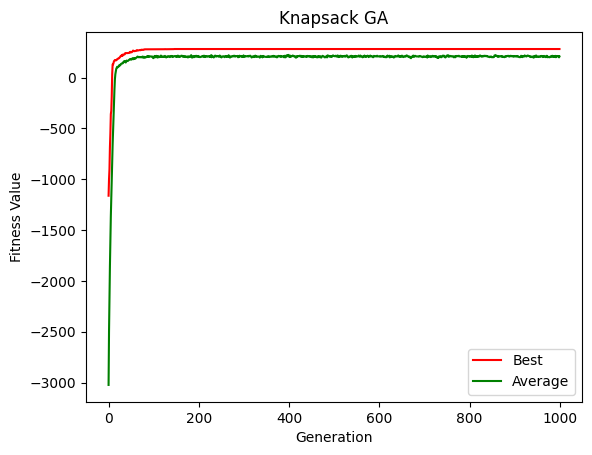

In [33]:
plt.plot(maxFitnessValues, color='red', label='Best')
plt.plot(meanFitnessValues, color='green', label='Average')
plt.title('Knapsack GA')
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.legend()
plt.show()

**Second Experimental Setu**p, **`*just for comparison*`**: with different values, P_MUTATION = 0.5
P_CROSSOVER = 0.8
TOURNAMENT_SIZE = 3
MAX_GENERATIONS = 1000


Final Best Individual :
Best Individual:  [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
Total Value (Fitness):  -1263.0
Total Weight:  1721


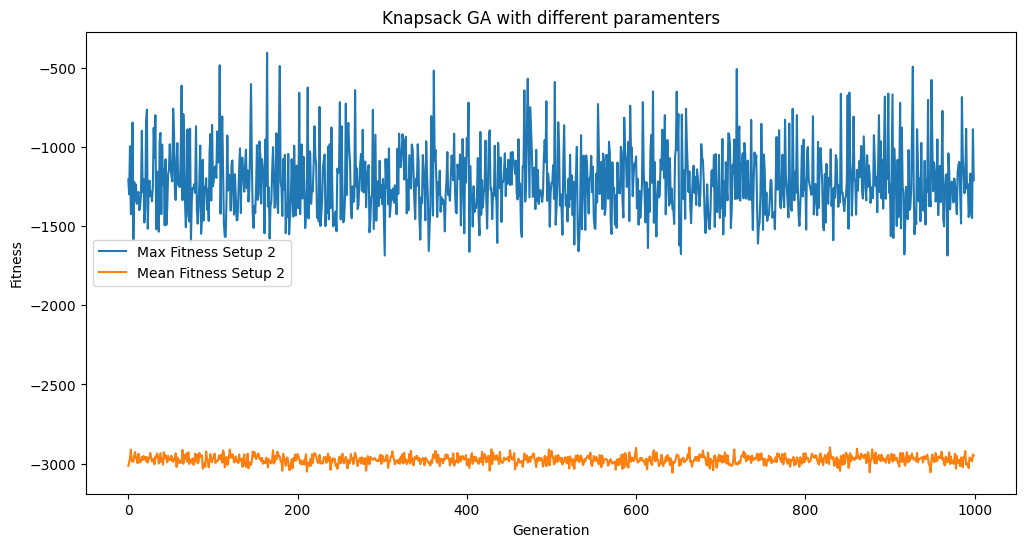

In [34]:
P_MUTATION = 0.5
P_CROSSOVER = 0.8
TOURNAMENT_SIZE = 3
MAX_GENERATIONS = 1000
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Individual generator
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, NBR_ITEMS)
# Population generator
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def knapsackFitness(individual):
    value = 0
    weight = 0

    for i in range(NBR_ITEMS):
        if individual[i] == 1:
            v, w = items[i]
            value += v
            weight += w
    a = 2
    if weight <= MAX_WEIGHT:
        fitness = value
    else:
        fitness = value - a * abs(MAX_WEIGHT - weight)
        #fitness =0

    return fitness,

toolbox.register("evaluate", knapsackFitness)
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=P_MUTATION)

maxFitness2, meanFitness2 = runGA( max_generations=MAX_GENERATIONS)


plt.figure(figsize=(12,6))
plt.plot(maxFitness2, label="Max Fitness Setup 2")
plt.plot(meanFitness2, label="Mean Fitness Setup 2")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Knapsack GA with different paramenters")
plt.legend()
plt.show()

**Comparison of both setup**

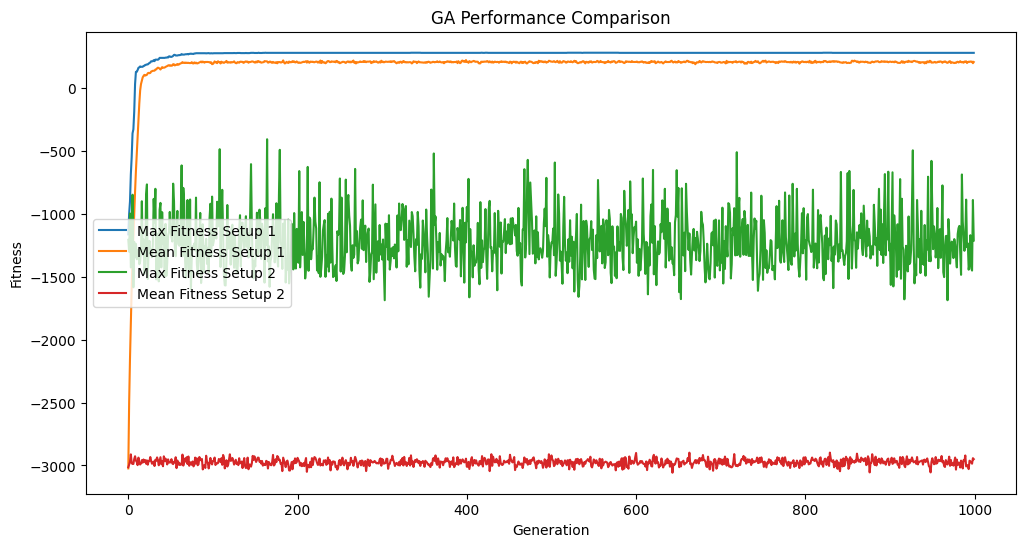

In [35]:
plt.figure(figsize=(12,6))
plt.plot(maxFitnessValues, label="Max Fitness Setup 1")
plt.plot(meanFitnessValues, label="Mean Fitness Setup 1")
plt.plot(maxFitness2, label="Max Fitness Setup 2")
plt.plot(meanFitness2, label="Mean Fitness Setup 2")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("GA Performance Comparison")
plt.legend()
plt.show()
